In [59]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pickle



In [97]:
##separate using delimiter
cr= pd.read_csv(r"C:\Users\Khushi\Downloads\CardioVascularDisease\CardioVascularDisease\cardio_train.csv",sep=';')
cr.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [91]:
#cr.height.value_counts()
cr.describe()
    #.value_counts()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
cr.isnull().sum()                                       ##No null values

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# convert numeric to factor 

In [7]:
cr.gender      = cr.gender.astype('category')
cr.alco        = cr.alco.astype('category')
cr.smoke       = cr.smoke.astype('category')
cr.cardio      = cr.cardio.astype('category')
cr.active      = cr.active.astype('category')

In [8]:
cat_type       = pd.CategoricalDtype(categories = [1,2,3],ordered = True)
cr.cholesterol = cr.cholesterol.astype(cat_type)
cr.gluc        = cr.gluc.astype(cat_type)

In [9]:
cr.describe(include= 'all')   

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.0,69301.000000,69301.000000,69301.000000,69301.000000,69301.0,69301.0,69301.0,69301.0,69301.0,69301.0
unique,NaN,NaN,2.0,NaN,NaN,NaN,NaN,3.0,3.0,2.0,2.0,2.0,2.0
top,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,1.0,0.0
freq,NaN,NaN,45079.0,NaN,NaN,NaN,NaN,51868.0,58885.0,63199.0,65567.0,55717.0,34679.0
mean,50471.480397,19468.786280,NaN,164.362217,74.203027,128.829584,96.650092,NaN,NaN,NaN,NaN,NaN,NaN
std,28563.100347,2467.261818,NaN,8.205337,14.383469,154.775805,189.096240,NaN,NaN,NaN,NaN,NaN,NaN
min,988.000000,10798.000000,NaN,55.000000,10.000000,-150.000000,-70.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,25745.000000,17664.000000,NaN,159.000000,65.000000,120.000000,80.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,50494.000000,19704.000000,NaN,165.000000,72.000000,120.000000,80.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,75150.000000,21326.000000,NaN,170.000000,82.000000,140.000000,90.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
cr.cardio.value_counts()                                ## check for class imbalance if any

0    34679
1    34622
Name: cardio, dtype: int64

In [122]:
cr.head(2)
X = cr.drop(columns = ['id'])

# data cleaning

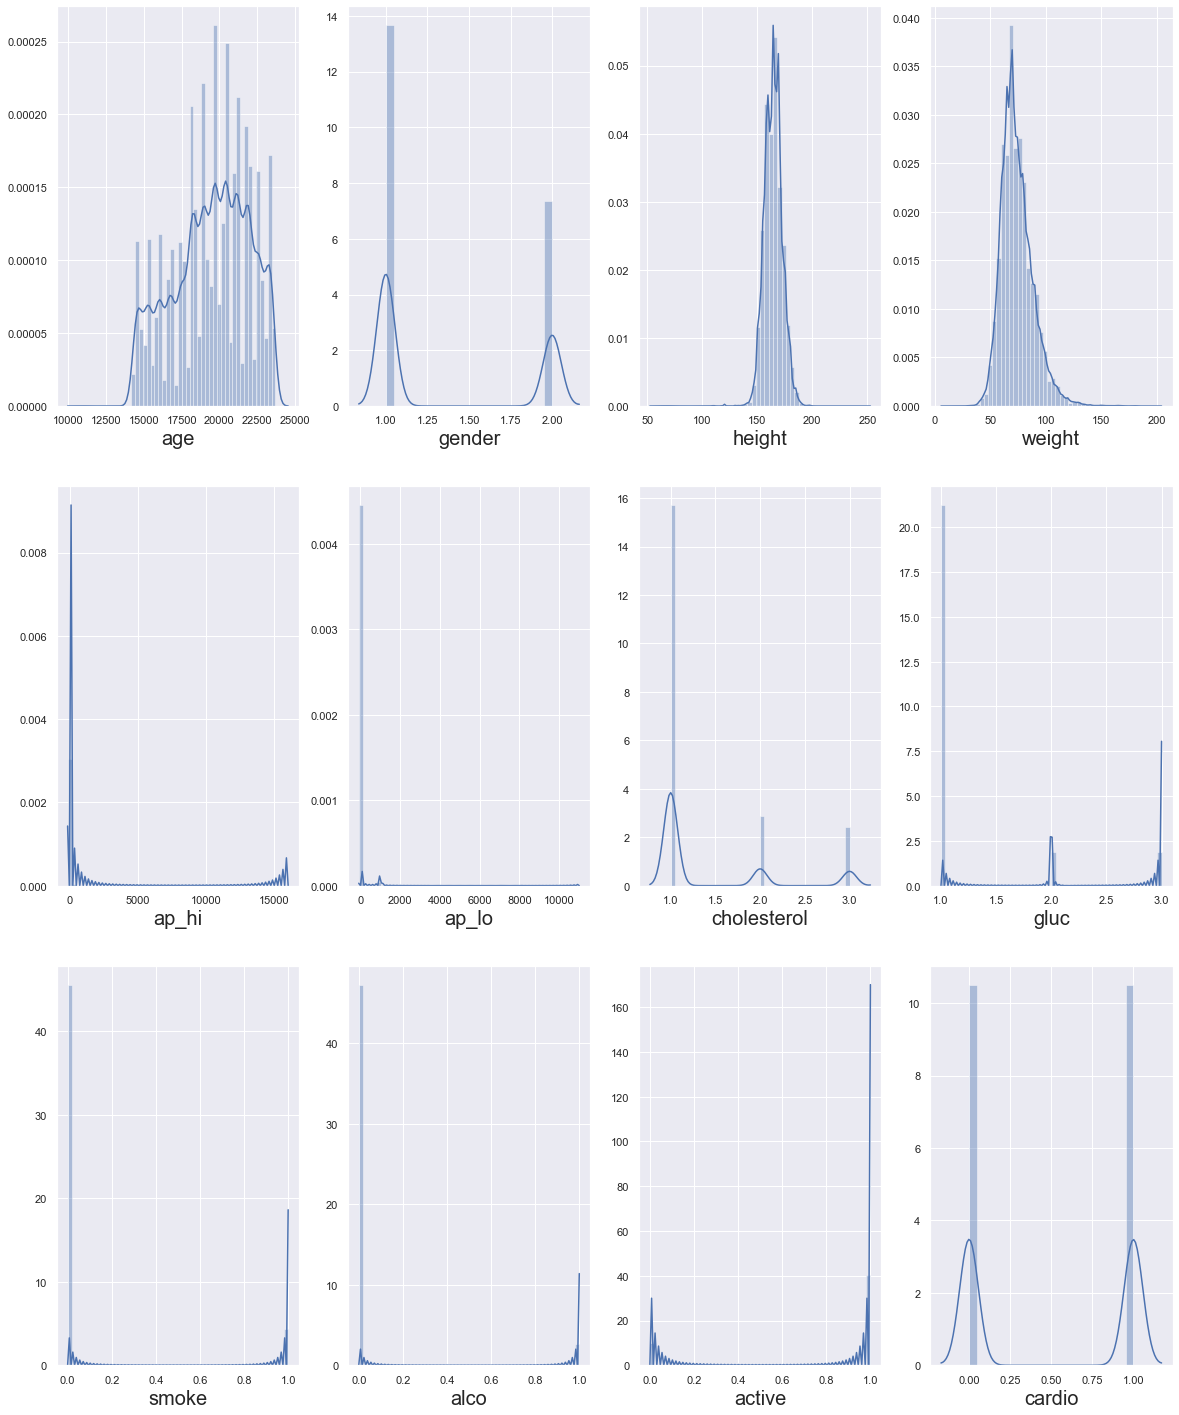

In [123]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=12 :
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


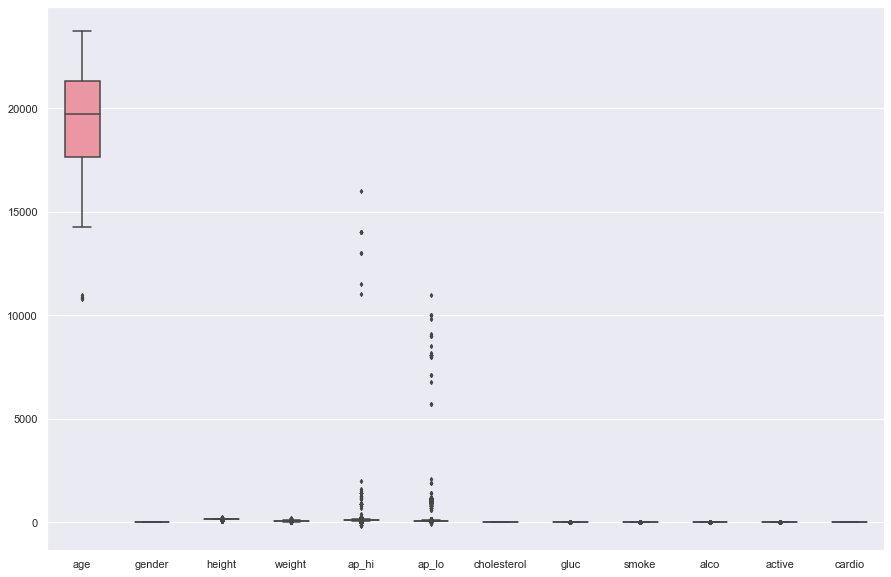

In [125]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=X, width= 0.5,ax=ax,  fliersize=3)

In [126]:
data_cleaned = X
q = data_cleaned['weight'].quantile(0.95)
# we are removing the top 5% data from the Weight column
data_cleaned  = data_cleaned[data_cleaned['weight']<q]

print(X.shape)
print(data_cleaned.shape)

(69301, 12)
(65487, 12)


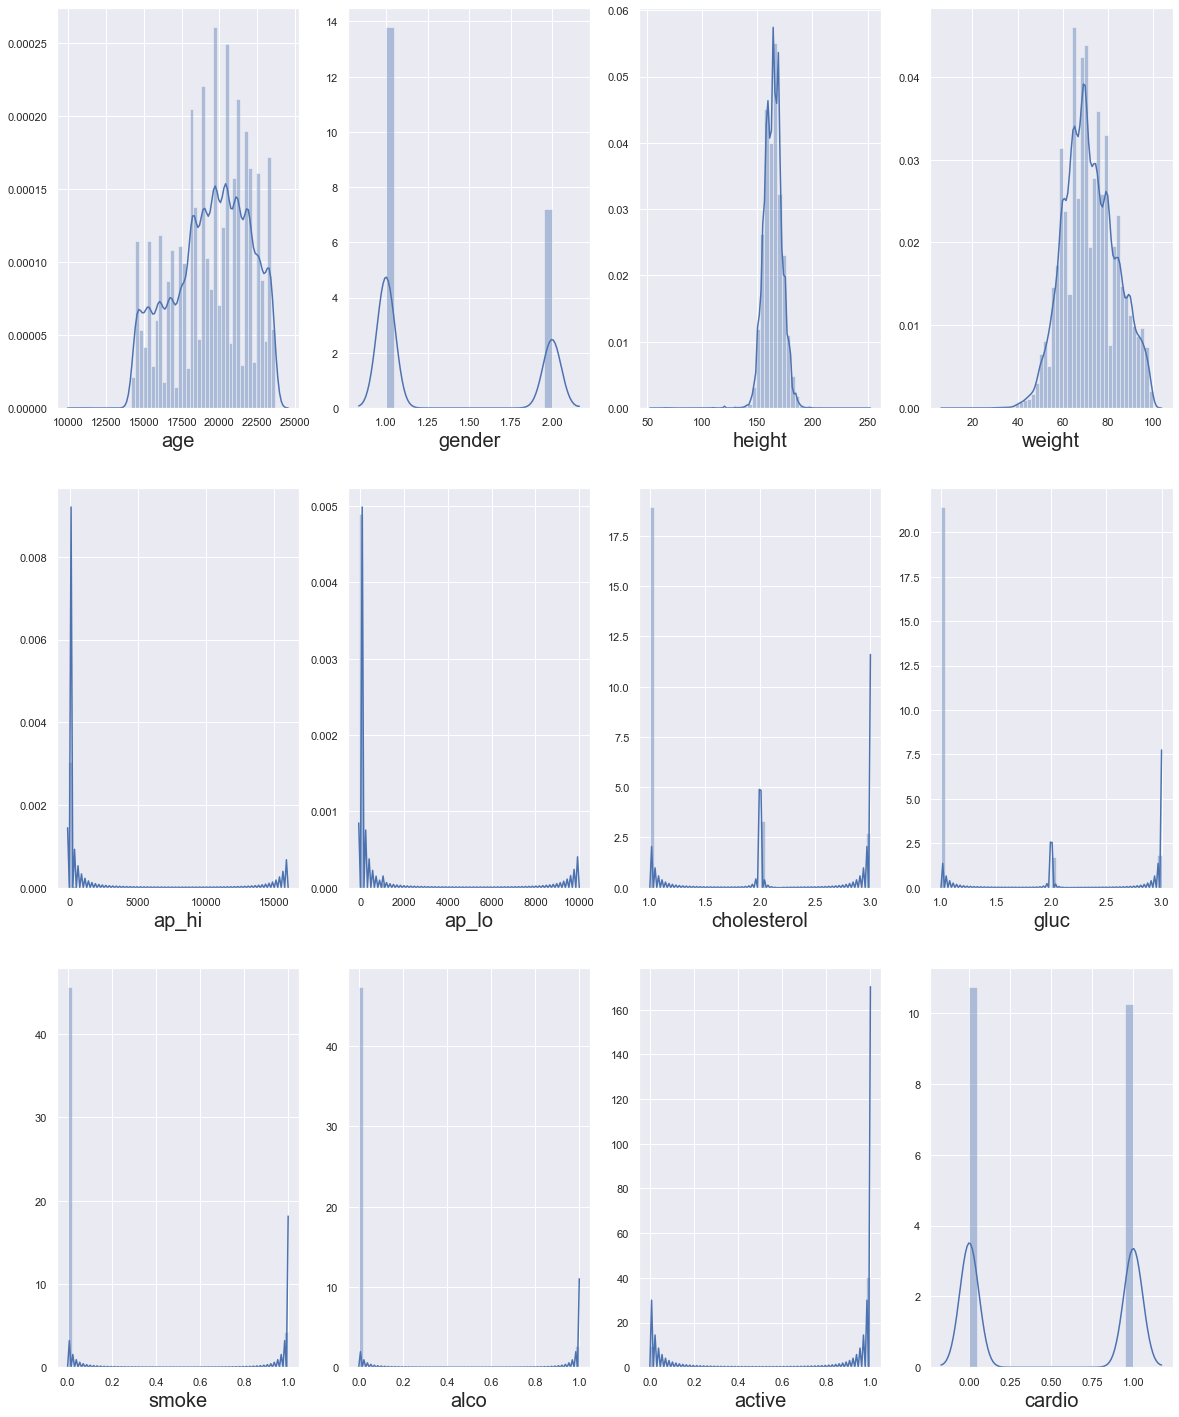

In [127]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=12 :
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# sampling

In [147]:
cr_x  = data_cleaned.iloc[ : , 0:11]                                          ## select test data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(cr_x)
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = cr_x.columns

#let's check the values
vif

,vif,Features
0,1.040699,age
1,1.437395,gender
2,1.427093,height
3,1.137595,weight
4,1.001593,ap_hi
5,1.002125,ap_lo
6,1.297447,cholesterol
7,1.259667,gluc
8,1.252449,smoke
9,1.142770,alco


In [148]:
cr_x.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,22469,1,155,69.0,130,80,2,2,0,0,1
1,14648,1,163,71.0,110,70,1,1,0,0,1


In [149]:
cr_y  = data_cleaned.iloc[ : , -1]
cr_y.head(2)

0    0
1    1
Name: cardio, dtype: int64

In [174]:
import sklearn                                         ## Train test split
from sklearn.model_selection import train_test_split

cr_x_train, cr_x_test,cr_y_train, cr_y_test = train_test_split(X_scaled, cr_y, test_size= 0.2 , random_state = 101)


# MODEL BUILDING

In [158]:
from sklearn.linear_model import LogisticRegression

In [159]:
logmodel = LogisticRegression()

In [160]:
logmodel.fit(cr_x_train , cr_y_train)   ## to build the model---> type of mmode and <fit>

C:\Users\Khushi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [161]:
pred = logmodel.predict(cr_x_test)               ##predicted values
pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

# create confusion matrix

In [162]:
from sklearn.metrics import confusion_matrix

tab= confusion_matrix (pred, cr_y_test)
tab

array([[5285, 2106],
       [1476, 4231]], dtype=int64)

In [163]:
tab.diagonal().sum()  / tab.sum() *100   #### gives the accuracy

72.65231333027943

# -------------------------------decision tree----------------------------------------------------

In [164]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(min_samples_split=500,random_state=102)  ##create an instance
dtree.fit (cr_x_train, cr_y_train)   ###buid a decision tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=102, splitter='best')

In [165]:
pred_value_dt = dtree.predict(cr_x_test)   ### predict values

In [166]:
pred_value_dt

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [167]:
tab2 = confusion_matrix (pred_value_dt, cr_y_test)
tab2

array([[5246, 2017],
       [1515, 4320]], dtype=int64)

In [171]:
tab2.diagonal().sum()/tab2.sum() *100   #### gives the accuracy

73.0340510001527

In [180]:
df_1 = pd.DataFrame({'Feature_name':list(cr_x.columns),'Feature_score':list(dtree.feature_importances_)}) 

In [182]:
df_sort = df_1.sort_values(['Feature_score'],ascending=False)
df_sort

,Feature_name,Feature_score
4,ap_hi,0.709238
0,age,0.149758
6,cholesterol,0.067055
3,weight,0.025093
2,height,0.014422
5,ap_lo,0.011500
10,active,0.007338
7,gluc,0.007274
8,smoke,0.003902
1,gender,0.002487


# -------------------------random forest(final model)---------------------------------------

In [183]:
from sklearn.ensemble import RandomForestClassifier

In [220]:
rfc = RandomForestClassifier(min_samples_split=680, random_state = 102)
rfc.fit(cr_x_train, cr_y_train)

C:\Users\Khushi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=680,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=102,
                       verbose=0, warm_start=False)

In [221]:
pred_rf = rfc.predict(cr_x_test)
pred_rf

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [222]:
tab3= confusion_matrix (pred_rf, cr_y_test)
tab3

array([[5274, 1927],
       [1487, 4410]], dtype=int64)

In [247]:
tab3.diagonal().sum()  / tab3.sum() *100   #### gives the accuracy

73.9349519010536

In [249]:
true_positive =  tab3[0][0]
false_positive = tab3[0][1]
false_negative = tab3[1][0]
true_negative =  tab3[1][1]

In [251]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7393495190105359

In [253]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.7323982780169421

In [255]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7800621209880195

In [257]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.7554791577137946

In [260]:
# Area Under Curve
auc = roc_auc_score(cr_y_test, pred_rf)
auc

0.7379875067619599

# ROC

In [262]:
fpr, tpr, thresholds = roc_curve(cr_y_test, pred_rf)

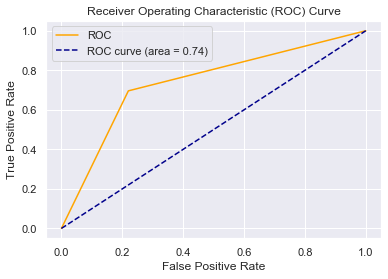

In [263]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Feature score

In [246]:
df_2 = pd.DataFrame({'Feature_name':list(cr_x.columns),'Feature_score':list(rfc.feature_importances_)}) 
df_2.sort_values(['Feature_score'], ascending=False) 

,Feature_name,Feature_score
4,ap_hi,0.535934
5,ap_lo,0.180879
0,age,0.136126
6,cholesterol,0.081842
3,weight,0.034523
2,height,0.010521
10,active,0.007380
7,gluc,0.007014
8,smoke,0.002345
9,alco,0.002121


# MODEL SAVE

In [282]:
#saving the model to the local file system 
filename = 'finalized_modelcardio.pickle' 
pickle.dump(rfc, open(filename, 'wb'))

In [283]:
loaded_model = pickle.load(open(filename, 'rb')) 
prediction=loaded_model.predict(([[ 0.9900287 ,  1.38250124,  0.72550098, -0.18428084, -0.05383269,
       -0.08360307, -0.52636606, -0.38451114, -0.30641969, -0.23441155,
        0.49210381]])) 
print(prediction[0])

0


In [264]:
##datefunction - age
##gender conversion

##--------------drop down
##cholestorel,
##gluc
##smoke
##alco
##active

##standard scaler call after taking input and pass to model

In [280]:
X.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [284]:
X.shape

(69301, 12)